In [3]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import contractions
import string
import nltk
import re
from nltk.corpus import stopwords
import gensim
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from textblob import TextBlob
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN, GRU, LSTM, Dense, Activation
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim.downloader as api
from collections import Counter
import seaborn as sns

from gensim.models import CoherenceModel
import pyLDAvis.gensim_models
import warnings

nltk.download('wordnet')
nltk.download('stopwords')
wv = api.load('word2vec-google-news-300')

warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/allupraveen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/allupraveen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
with open('ggvec.npy', 'wb') as f:
    np.save(f,wv)

In [3]:
df_train = pd.read_csv('../data/cleaned/train.csv')
df_test = pd.read_csv('../data/cleaned/test.csv')
df_val = pd.read_csv('../data/cleaned/val.csv')


In [4]:
df_train

,tweet_text,location,type,target,datetime,year,date,time
0,donbradshawntv marshallampsuk came assistance ...,Canada,wildfire,0,2016-05-06 16:54:00,2016,2016-05-06,16:54:00
1,red cross distributes fo mcmurray wildfire eva...,Canada,wildfire,1,2016-05-30 17:30:57,2016,2016-05-30,17:30:57
2,interesting insights shifting communications l...,Canada,wildfire,0,2016-04-30 23:18:34,2016,2016-04-30,23:18:34
3,globeandmail oil sands producers helping worke...,Canada,wildfire,0,2016-05-30 08:00:05,2016,2016-05-30,08:00:05
4,ottawa match red cross donations fo mcmurray w...,Canada,wildfire,0,2016-05-06 21:06:11,2016,2016-05-06,21:06:11
...,...,...,...,...,...,...,...,...
31181,https co mzh h uqh nepal cloud burst death tol...,Earth,hurricane,0,2017-08-14 03:32:29+00:00,2017,2017-08-14,03:32:29
31182,wear uniform days year rain shine flood draugh...,Hopes Peak,hurricane,0,2017-08-11 09:27:36+00:00,2017,2017-08-11,09:27:36
31183,flash flood town dad still wants water plants,"Boston, MA",flood,0,2017-08-02 20:44:29+00:00,2017,2017-08-02,20:44:29
31184,brahmaputra water level recedes assam flood to...,India,flood,0,2017-08-19 03:20:57+00:00,2017,2017-08-19,03:20:57


In [5]:
df_train['text_split'] = df_train['tweet_text'].str.split()
df_train = df_train.dropna()

df_test['text_split'] = df_test['tweet_text'].str.split()
df_test = df_test.dropna()

df_val['text_split'] = df_val['tweet_text'].str.split()
df_val = df_val.dropna()

In [6]:
df_train.isnull().sum()

tweet_text    0
location      0
type          0
target        0
datetime      0
year          0
date          0
time          0
text_split    0
dtype: int64

In [ ]:
# Create an empty list to store the mean vectors
mean_vectors = []

# Iterate over each row of the DataFrame
for index, row in df_train.iterrows():
    # Convert each list of words into a numpy array of word embeddings
    word_embeddings = []
    for word in row['text_split']:
        try:
            word_embeddings.append(wv[word])
        except KeyError:
            pass
    if word_embeddings == []:
      mean_vector = np.array(wv['unk'])
    else:
      # Calculate the mean vector of the word embeddings along the first axis
      mean_vector = np.array(np.mean(np.array(word_embeddings), axis=0))
    # Append the mean vector to the list
    mean_vectors.append(mean_vector)

In [7]:
# Create an empty list to store the mean vectors
mean_vectors = []

# Iterate over each row of the DataFrame
for index, row in df_train.iterrows():
    # Convert each list of words into a numpy array of word embeddings
    word_embeddings = []
    for word in row['text_split']:
        try:
            word_embeddings.append(wv[word])
        except KeyError:
            pass
    if word_embeddings == []:
      mean_vector = np.array(wv['unk'])
    else:
      # Calculate the mean vector of the word embeddings along the first axis
      mean_vector = np.array(np.mean(np.array(word_embeddings), axis=0))
    # Append the mean vector to the list
    mean_vectors.append(mean_vector)

In [8]:
# Create an empty list to store the mean vectors test set
mean_vectors_test = []

# Iterate over each row of the DataFrame
for index, row in df_test.iterrows():
    # Convert each list of words into a numpy array of word embeddings
    word_embeddings_test = []
    for word in row['text_split']:
        try:
            word_embeddings_test.append(wv[word])
        except KeyError:
            pass
    if word_embeddings_test == []:
      mean_vector_test = np.array(wv['unk'])
    else:
      # Calculate the mean vector of the word embeddings along the first axis
      mean_vector_test = np.array(np.mean(np.array(word_embeddings_test), axis=0))
    # Append the mean vector to the list
    mean_vectors_test.append(mean_vector_test)

In [9]:
# Create an empty list to store the mean vectors test set
mean_vectors_val = []

# Iterate over each row of the DataFrame
for index, row in df_val.iterrows():
    # Convert each list of words into a numpy array of word embeddings
    word_embeddings_val = []
    for word in row['text_split']:
        try:
            word_embeddings_val.append(wv[word])
        except KeyError:
            pass
    if word_embeddings_val == []:
      word_embeddings_val = np.array(wv['unk'])
    else:
      # Calculate the mean vector of the word embeddings along the first axis
      mean_vector_val = np.array(np.mean(np.array(word_embeddings_val), axis=0))
    # Append the mean vector to the list
    mean_vectors_val.append(mean_vectors_val)

In [10]:
X_train = mean_vectors
y_train = df_train['target']
X_test = mean_vectors_test
y_test = df_test['target']

# Use SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [11]:
#Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on validation set
y_pred_rf = clf.predict(X_test)

precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

In [12]:
# SVM
clf_svm = make_pipeline(LinearSVC(random_state=0, tol=1e-5))
clf_svm.fit(X_train_resampled, y_train_resampled)

y_pred_svm = clf_svm.predict(X_test)

precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)

In [13]:

# convert input data from list to numpy array
X_train_resampled = np.array(X_train_resampled)
y_train_resampled = np.array(y_train_resampled)
X_test = np.array(X_test)

model = Sequential()
model.add(Dense(100, activation='relu', input_dim=X_train_resampled.shape[1]))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the model
y_pred_fnn = model.predict(X_test)
# y_pred_fnn = np.argmax(y_pred_fnn, axis=1)

Epoch 1/20


2023-03-26 16:01:10.485930: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1274/1274 [==============================] - 2s 2ms/step - loss: 0.3766 - accuracy: 0.8328 - val_loss: 0.3222 - val_accuracy: 0.8790
Epoch 2/20
1274/1274 [==============================] - 2s 1ms/step - loss: 0.3078 - accuracy: 0.8690 - val_loss: 0.3396 - val_accuracy: 0.8591
Epoch 3/20
1274/1274 [==============================] - 2s 1ms/step - loss: 0.2792 - accuracy: 0.8839 - val_loss: 0.3191 - val_accuracy: 0.8697
Epoch 4/20
1274/1274 [==============================] - 2s 1ms/step - loss: 0.2561 - accuracy: 0.8949 - val_loss: 0.2549 - val_accuracy: 0.9042
Epoch 5/20
1274/1274 [==============================] - 1s 1ms/step - loss: 0.2378 - accuracy: 0.9033 - val_loss: 0.1988 - val_accuracy: 0.9309
Epoch 6/20
1274/1274 [==============================] - 2s 1ms/step - loss: 0.2193 - accuracy: 0.9133 - val_loss: 0.2105 - val_accuracy: 0.9245
Epoch 7/20
1274/1274 [==============================] - 1s 1ms/step - loss: 0.2043 - accuracy: 0.9192 - val_loss: 0.1225 - val_accuracy: 0.9686
Epo

In [45]:

# convert input data from list to numpy array
X_train_resampled = np.array(X_train_resampled)
y_train_resampled = np.array(y_train_resampled)
X_test = np.array(X_test)

model = Sequential()
model.add(Dense(100, activation='relu', input_dim=X_train_resampled.shape[1]))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the model
y_pred_fnn_dense = model.predict(X_test)


Epoch 1/20
1274/1274 [==============================] - 4s 2ms/step - loss: 0.3722 - accuracy: 0.8345 - val_loss: 0.3267 - val_accuracy: 0.8764
Epoch 2/20
1274/1274 [==============================] - 2s 2ms/step - loss: 0.2937 - accuracy: 0.8780 - val_loss: 0.2101 - val_accuracy: 0.9373
Epoch 3/20
1274/1274 [==============================] - 2s 1ms/step - loss: 0.2614 - accuracy: 0.8948 - val_loss: 0.2427 - val_accuracy: 0.9104
Epoch 4/20
1274/1274 [==============================] - 2s 2ms/step - loss: 0.2362 - accuracy: 0.9074 - val_loss: 0.1838 - val_accuracy: 0.9461
Epoch 5/20
1274/1274 [==============================] - 2s 1ms/step - loss: 0.2149 - accuracy: 0.9157 - val_loss: 0.1507 - val_accuracy: 0.9574
Epoch 6/20
1274/1274 [==============================] - 2s 1ms/step - loss: 0.1979 - accuracy: 0.9219 - val_loss: 0.1353 - val_accuracy: 0.9583
Epoch 7/20
1274/1274 [==============================] - 2s 1ms/step - loss: 0.1767 - accuracy: 0.9317 - val_loss: 0.0893 - val_accuracy:

In [49]:
y_pred_binary = (y_pred_fnn > 0.5).astype(int)
y_pred_binary_dense = (y_pred_fnn_dense > 0.5).astype(int)
# y_pred_binary

In [50]:
precision_fnn = precision_score(y_test, y_pred_binary)
recall_fnn = recall_score(y_test, y_pred_binary)
f1_fnn = f1_score(y_test, y_pred_binary)
roc_auc_fnn = roc_auc_score(y_test, y_pred_binary)

precision_fnn_dense = precision_score(y_test, y_pred_binary_dense)
recall_fnn_dense = recall_score(y_test, y_pred_binary_dense)
f1_fnn_dense = f1_score(y_test, y_pred_binary_dense)
roc_auc_fnn_dense = roc_auc_score(y_test, y_pred_binary_dense)

In [51]:
data = {'Model': ['Random Forest', 'Support Vector Machine', 'Feedforward Neural Network','Dense Feedforward Neural Network'],
        'Precision': [precision_rf, precision_svm, precision_fnn,precision_fnn_dense],
        'Recall': [recall_rf, recall_svm, recall_fnn,recall_fnn_dense],
        'F1': [f1_rf, f1_svm, f1_fnn,f1_fnn_dense],
        'ROC-AUC': [roc_auc_rf, roc_auc_svm, roc_auc_fnn,roc_auc_fnn_dense]}

df = pd.DataFrame(data)
df = df.set_index('Model')

print(df)


                                  Precision    Recall        F1   ROC-AUC
Model                                                                    
Random Forest                      0.730233  0.647156  0.686189  0.778145
Support Vector Machine             0.652018  0.825639  0.728629  0.829081
Feedforward Neural Network         0.732846  0.744023  0.738392  0.820468
Dense Feedforward Neural Network   0.698238  0.784007  0.738641  0.827614


## Clustering analysis on tweets

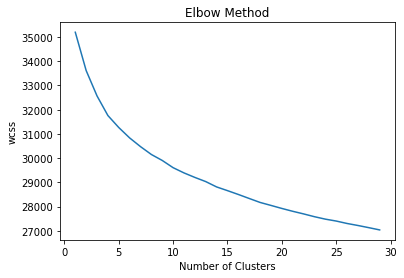

In [25]:
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,30), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [26]:
tweet_data = df_train
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=42)
kmeans.fit(X_train)
tweet_data['cluster_label'] = kmeans.labels_

In [11]:
stop_words = set(stopwords.words('english'))
wv = api.load('word2vec-google-news-300')

def create_mean_vectors(df_train,wv):
    # Create an empty list to store the mean vectors
    mean_vectors = []

    # Iterate over each row of the DataFrame
    for index, row in df_train.iterrows():
        # Convert each list of words into a numpy array of word embeddings
        word_embeddings = []
        for word in row['text_split']:
            try:
                word_embeddings.append(wv[word])
            except KeyError:
                pass
        if word_embeddings == []:
          mean_vector = np.array(wv['unk'])
        else:
          # Calculate the mean vector of the word embeddings along the first axis
          mean_vector = np.array(np.mean(np.array(word_embeddings), axis=0))
        # Append the mean vector to the list
        mean_vectors.append(mean_vector)
    return mean_vectors
def preprocess_tweet_text(tweet):
    # Removing URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Removing user mentions
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    # Removing punctuation
    tweet = re.sub(r'[^\w\s]', '', tweet)
    # Converting to lowercase
    tweet = tweet.lower()
    # Tokenizing the tweet
    tweet = nltk.word_tokenize(tweet)
    # Removing stop words
    tweet = [word for word in tweet if not word in stop_words]
    return tweet

def extract_tweets_in_cluster(tweet_data, cluster_label):
    return tweet_data[tweet_data['cluster_label'] == cluster_label]['tweet_text']


def analyze_sentiment(cluster_tweets):
    sentiment_scores = []
    for tweet in cluster_tweets:
        blob = TextBlob(tweet)
        sentiment_scores.append(blob.sentiment.polarity)
    return sentiment_scores


def calculate_avg_sentiment_score(sentiment_scores):
    return np.mean(sentiment_scores)


def get_top_words(cluster_tweets, stop_words=None, n=10):
    words = []
    for tweet in cluster_tweets:
        words.extend(preprocess_tweet_text(tweet))
    word_freq = nltk.FreqDist(words)
    top_words = word_freq.most_common(n)
    unique_words = []
    for word in top_words:
        if stop_words is None or word[0] not in stop_words:
            unique_words.append(word[0])
        if len(unique_words) == n:
            break
    return unique_words, [word_freq[word] for word in unique_words]

def elbow_method(df,wv):
    wcss = []
    X= create_mean_vectors(df,wv)
    for i in range(1, 15):
        kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1,15), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('wcss')
    plt.show()

def analyze_cluster(tweet_data, X_train,k=3, max_iter=100, random_state=42):
    # perform clustering
    model = KMeans(n_clusters=k,init='k-means++', max_iter=max_iter, random_state=random_state)
    model.fit(X_train)
    tweet_data['cluster_label'] = model.labels_
    # get cluster labels and centroids
    cluster_labels = model.labels_
    centroids = model.cluster_centers_

    # analyze clusters
    for i in range(k):
        # Extracting tweets in the current cluster
        cluster_tweets = extract_tweets_in_cluster(tweet_data, i)
        
        # Analyzing sentiment
        sentiment_scores = analyze_sentiment(cluster_tweets)
        
        # Calculating average sentiment score
        avg_sentiment_score = calculate_avg_sentiment_score(sentiment_scores)
        
        # Calculating severity score
        #severity_scores = model.transform(vectorizer.transform(cluster_tweets))
        #avg_severity_score = np.mean(severity_scores[:, i])
        mean_vectors = []
        for tweet in cluster_tweets:
            # Convert each list of words into a numpy array of word embeddings
            word_embeddings = []
            for word in preprocess_tweet_text(tweet):
                try:
                    word_embeddings.append(wv[word])
                except KeyError:
                    pass
            if word_embeddings == []:
                mean_vector = np.array(wv['unk'])
            else:
                # Calculate the mean vector of the word embeddings along the first axis
                mean_vector = np.array(np.mean(np.array(word_embeddings), axis=0))
            # Append the mean vector to the list
            mean_vectors.append(mean_vector)
        severity_scores = model.transform(mean_vectors)
        avg_severity_score = np.mean(severity_scores[:, i])
        # Getting top words
        top_words, top_word_freq = get_top_words(cluster_tweets, n=10)
        
        # Plotting frequency of top words
        plt.barh(top_words, top_word_freq)
        plt.title('Cluster {} Top Words'.format(i))
        plt.show()
        
        # Printing statistics for the cluster
        print('Cluster {}:'.format(i))
        print('Number of tweets:', len(cluster_tweets))
        print('Average sentiment score:', avg_sentiment_score)
        print('Average severity score:', avg_severity_score)
        print('Top words that influence sentiment score:', top_words)
        print('\n')
def tweet_cluster_analysis(df,wv,k):
    X_train= create_mean_vectors(df,wv)
    analyze_cluster(tweet_data=df,X_train=X_train,k=k)

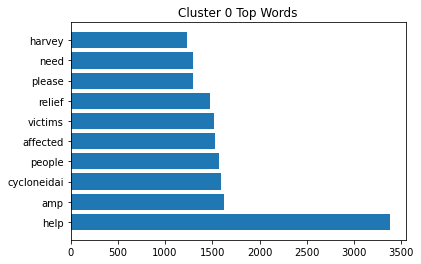

Cluster 0:
Number of tweets: 11871
Average sentiment score: 0.06881947442062128
Average severity score: 0.9523193246701875
Top words that influence sentiment score: ['help', 'amp', 'cycloneidai', 'people', 'affected', 'victims', 'relief', 'please', 'need', 'harvey']




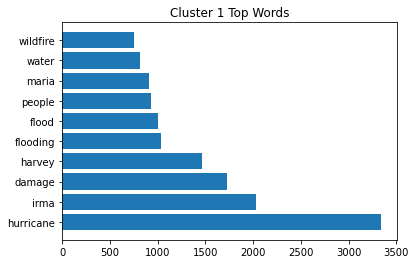

Cluster 1:
Number of tweets: 10996
Average sentiment score: -0.0044442640263620626
Average severity score: 1.0221986381160266
Top words that influence sentiment score: ['hurricane', 'irma', 'damage', 'harvey', 'flooding', 'flood', 'people', 'maria', 'water', 'wildfire']




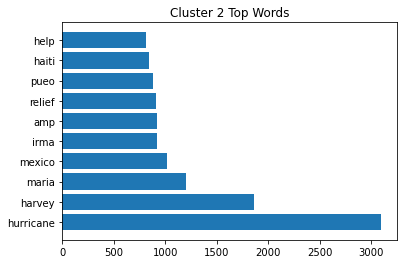

Cluster 2:
Number of tweets: 8318
Average sentiment score: 0.012853551558844297
Average severity score: 1.0100495704699217
Top words that influence sentiment score: ['hurricane', 'harvey', 'maria', 'mexico', 'irma', 'amp', 'relief', 'pueo', 'haiti', 'help']




In [41]:
analyze_cluster(tweet_data=df_train,X_train=X_train,k=3)

In [ ]:
tweet_data

In [ ]:
len(X_train)

In [5]:
df_train_all = pd.read_csv('../data/cleaned/all.csv')
df_train_all['text_split'] = df_train_all['tweet_text'].str.split()
df_train_all = df_train_all.dropna()

In [6]:
df_train_all

,tweet_text,location,type,target,datetime,year,date,time,text_split
0,donbradshawntv marshallampsuk came assistance ...,Canada,wildfire,0,2016-05-06 16:54:00,2016,2016-05-06,16:54:00,"[donbradshawntv, marshallampsuk, came, assista..."
1,red cross distributes fo mcmurray wildfire eva...,Canada,wildfire,1,2016-05-30 17:30:57,2016,2016-05-30,17:30:57,"[red, cross, distributes, fo, mcmurray, wildfi..."
2,interesting insights shifting communications l...,Canada,wildfire,0,2016-04-30 23:18:34,2016,2016-04-30,23:18:34,"[interesting, insights, shifting, communicatio..."
3,globeandmail oil sands producers helping worke...,Canada,wildfire,0,2016-05-30 08:00:05,2016,2016-05-30,08:00:05,"[globeandmail, oil, sands, producers, helping,..."
4,ottawa match red cross donations fo mcmurray w...,Canada,wildfire,0,2016-05-06 21:06:11,2016,2016-05-06,21:06:11,"[ottawa, match, red, cross, donations, fo, mcm..."
...,...,...,...,...,...,...,...,...,...
44494,remove negative people situations life sta att...,"Dallas, TX",flood,0,2017-08-11 03:07:32+00:00,2017,2017-08-11,03:07:32,"[remove, negative, people, situations, life, s..."
44495,italian kills traps https co mjnay egp trendin...,United States,earthquake,0,2017-08-22 03:48:23+00:00,2017,2017-08-22,03:48:23,"[italian, kills, traps, https, co, mjnay, egp,..."
44496,finally gets sleep mins later,"Tokyo, Japan",earthquake,1,2017-08-01 17:08:10+00:00,2017,2017-08-01,17:08:10,"[finally, gets, sleep, mins, later]"
44497,bhushantuladhar safe,Kathmandu,earthquake,0,2017-08-18 11:01:12+00:00,2017,2017-08-18,11:01:12,"[bhushantuladhar, safe]"


In [7]:
df_train_all['type'].value_counts()

hurricane     27923
earthquake     7355
cyclone        3933
wildfire       3757
flood          1529
Name: type, dtype: int64

In [8]:
df_list = [y for x, y in df_train_all.groupby('type')]

In [12]:
X_train_all= create_mean_vectors(df_train_all,wv)

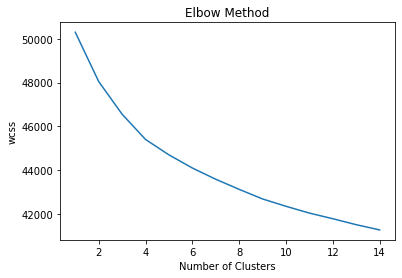

In [13]:
elbow_method(df_train_all,wv)

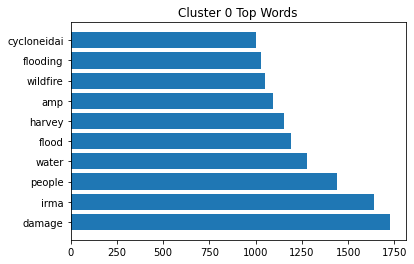

Cluster 0:
Number of tweets: 12916
Average sentiment score: -0.0031886856616165217
Average severity score: 0.9990719701096963
Top words that influence sentiment score: ['damage', 'irma', 'people', 'water', 'flood', 'harvey', 'amp', 'wildfire', 'flooding', 'cycloneidai']




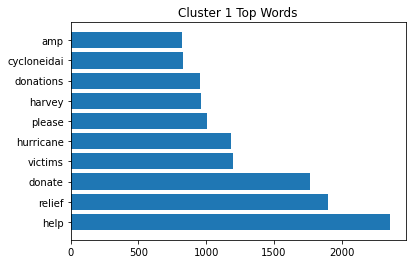

Cluster 1:
Number of tweets: 6726
Average sentiment score: 0.060283237985624245
Average severity score: 0.9650485110471012
Top words that influence sentiment score: ['help', 'relief', 'donate', 'victims', 'hurricane', 'please', 'harvey', 'donations', 'cycloneidai', 'amp']




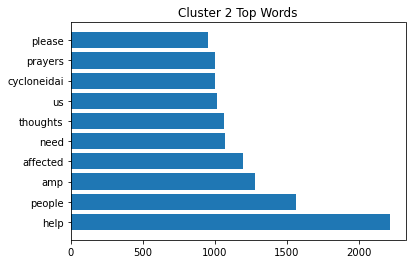

Cluster 2:
Number of tweets: 9018
Average sentiment score: 0.07382641926624399
Average severity score: 0.9190326567096593
Top words that influence sentiment score: ['help', 'people', 'amp', 'affected', 'need', 'thoughts', 'us', 'cycloneidai', 'prayers', 'please']




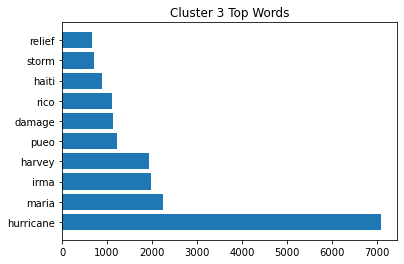

Cluster 3:
Number of tweets: 7798
Average sentiment score: 0.006945612529159593
Average severity score: 0.9630248225621512
Top words that influence sentiment score: ['hurricane', 'maria', 'irma', 'harvey', 'pueo', 'damage', 'rico', 'haiti', 'storm', 'relief']




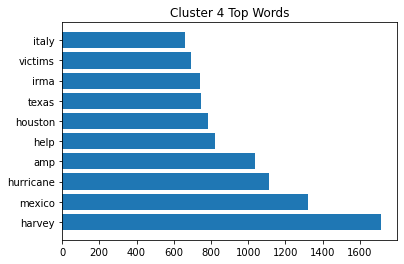

Cluster 4:
Number of tweets: 8039
Average sentiment score: 0.0191189747972308
Average severity score: 1.0103904802928256
Top words that influence sentiment score: ['harvey', 'mexico', 'hurricane', 'amp', 'help', 'houston', 'texas', 'irma', 'victims', 'italy']




In [14]:
analyze_cluster(tweet_data=df_train_all,X_train=X_train_all,k=5)

In [15]:
df_cyclone = df_list[0]
df_earthquake = df_list[1]
df_flood = df_list[2]
df_hurricane = df_list[3]
df_wildfire = df_list[4]

# Cluster analysis on each disaster

## Earthquake Dataset

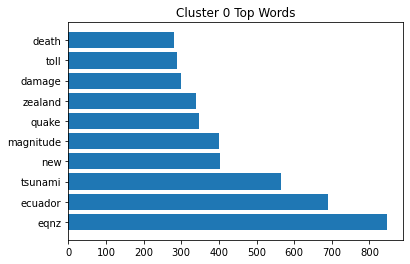

Cluster 0:
Number of tweets: 2798
Average sentiment score: 0.012368598585315882
Average severity score: 1.0465835506783416
Top words that influence sentiment score: ['eqnz', 'ecuador', 'tsunami', 'new', 'magnitude', 'quake', 'zealand', 'damage', 'toll', 'death']




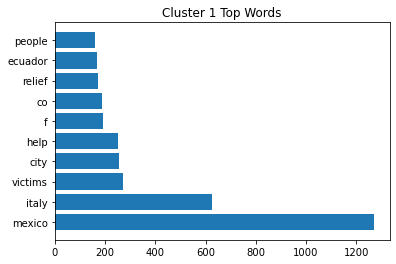

Cluster 1:
Number of tweets: 2019
Average sentiment score: 0.011156722178267497
Average severity score: 1.0673142869103327
Top words that influence sentiment score: ['mexico', 'italy', 'victims', 'city', 'help', 'f', 'co', 'relief', 'ecuador', 'people']




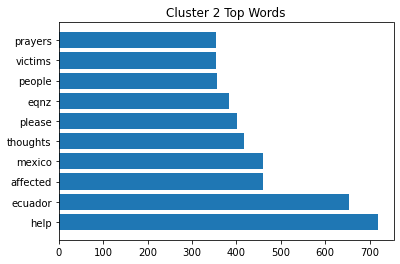

Cluster 2:
Number of tweets: 2538
Average sentiment score: 0.07380448140643175
Average severity score: 0.9881854548167173
Top words that influence sentiment score: ['help', 'ecuador', 'affected', 'mexico', 'thoughts', 'please', 'eqnz', 'people', 'victims', 'prayers']




In [16]:
tweet_cluster_analysis(df_earthquake,wv,k=3)

## Clyclone Dataset

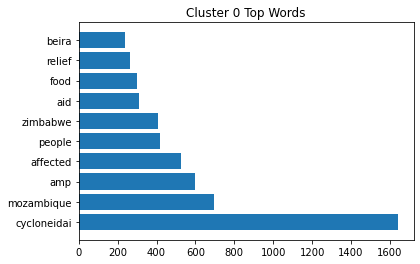

Cluster 0:
Number of tweets: 1901
Average sentiment score: 0.04487057864607275
Average severity score: 0.8100220566136571
Top words that influence sentiment score: ['cycloneidai', 'mozambique', 'amp', 'affected', 'people', 'zimbabwe', 'aid', 'food', 'relief', 'beira']




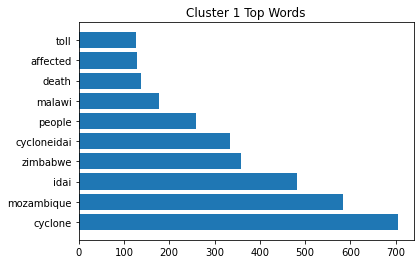

Cluster 1:
Number of tweets: 804
Average sentiment score: -0.045963042381885665
Average severity score: 0.9060001800948326
Top words that influence sentiment score: ['cyclone', 'mozambique', 'idai', 'zimbabwe', 'cycloneidai', 'people', 'malawi', 'death', 'affected', 'toll']




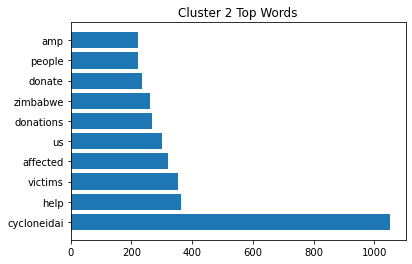

Cluster 2:
Number of tweets: 1228
Average sentiment score: 0.0908950144363418
Average severity score: 0.8690821273047404
Top words that influence sentiment score: ['cycloneidai', 'help', 'victims', 'affected', 'us', 'donations', 'zimbabwe', 'donate', 'people', 'amp']




In [17]:
tweet_cluster_analysis(df_cyclone,wv,k=3)

## Flood Dataset

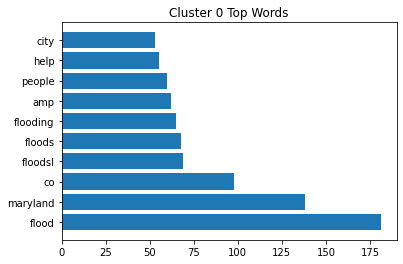

Cluster 0:
Number of tweets: 503
Average sentiment score: 0.041743587178229326
Average severity score: 0.907450167610425
Top words that influence sentiment score: ['flood', 'maryland', 'co', 'floodsl', 'floods', 'flooding', 'amp', 'people', 'help', 'city']




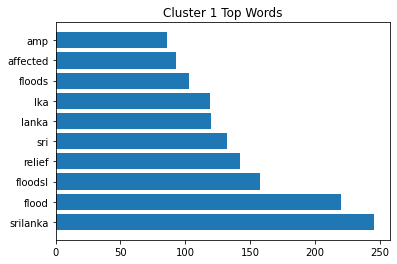

Cluster 1:
Number of tweets: 448
Average sentiment score: -0.012591556508967221
Average severity score: 0.906506652538174
Top words that influence sentiment score: ['srilanka', 'flood', 'floodsl', 'relief', 'sri', 'lanka', 'lka', 'floods', 'affected', 'amp']




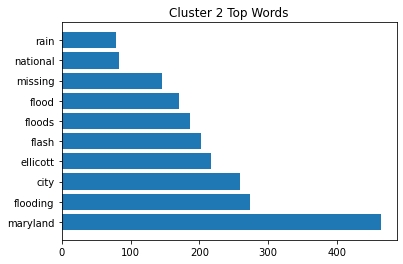

Cluster 2:
Number of tweets: 578
Average sentiment score: -0.0895832599974036
Average severity score: 0.8341583890661417
Top words that influence sentiment score: ['maryland', 'flooding', 'city', 'ellicott', 'flash', 'floods', 'flood', 'missing', 'national', 'rain']




In [18]:
tweet_cluster_analysis(df_flood,wv,k=3)

## Hurricane Dataset

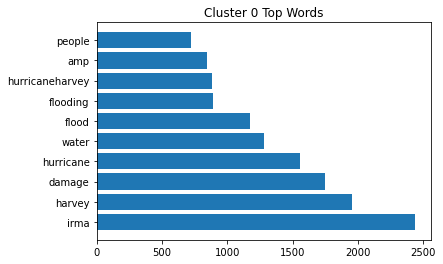

Cluster 0:
Number of tweets: 9764
Average sentiment score: 0.011528736105830533
Average severity score: 0.9945034255004969
Top words that influence sentiment score: ['irma', 'harvey', 'damage', 'hurricane', 'water', 'flood', 'flooding', 'hurricaneharvey', 'amp', 'people']




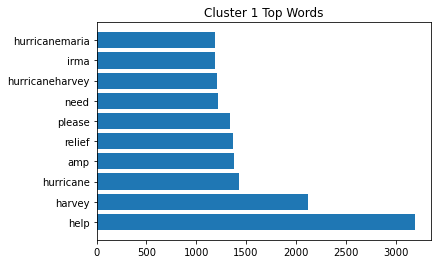

Cluster 1:
Number of tweets: 9258
Average sentiment score: 0.07207245532295488
Average severity score: 0.9742382970154118
Top words that influence sentiment score: ['help', 'harvey', 'hurricane', 'amp', 'relief', 'please', 'need', 'hurricaneharvey', 'irma', 'hurricanemaria']




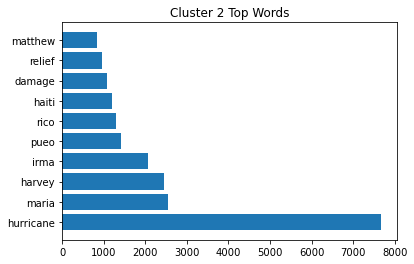

Cluster 2:
Number of tweets: 8901
Average sentiment score: 0.00626812755520204
Average severity score: 0.9736289986861023
Top words that influence sentiment score: ['hurricane', 'maria', 'harvey', 'irma', 'pueo', 'rico', 'haiti', 'damage', 'relief', 'matthew']




In [19]:
tweet_cluster_analysis(df_hurricane,wv,k=3)

## Wildfire Dataset

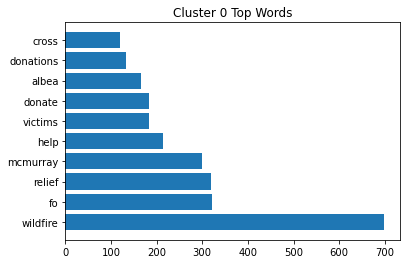

Cluster 0:
Number of tweets: 860
Average sentiment score: 0.0438094650827209
Average severity score: 0.9351524764614412
Top words that influence sentiment score: ['wildfire', 'fo', 'relief', 'mcmurray', 'help', 'victims', 'donate', 'albea', 'donations', 'cross']




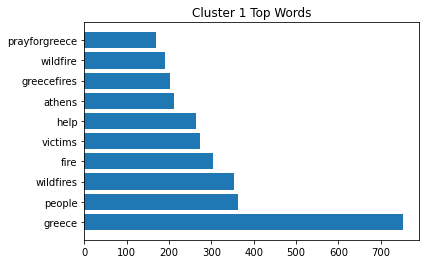

Cluster 1:
Number of tweets: 1445
Average sentiment score: 0.011443091942659415
Average severity score: 0.8978716089016799
Top words that influence sentiment score: ['greece', 'people', 'wildfires', 'fire', 'victims', 'help', 'athens', 'greecefires', 'wildfire', 'prayforgreece']




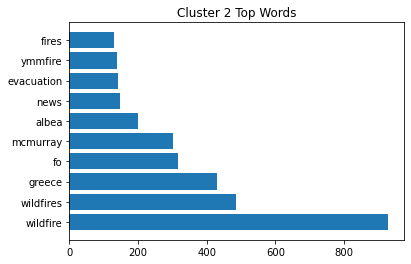

Cluster 2:
Number of tweets: 1452
Average sentiment score: -0.013705642239991413
Average severity score: 0.9789457963256633
Top words that influence sentiment score: ['wildfire', 'wildfires', 'greece', 'fo', 'mcmurray', 'albea', 'news', 'evacuation', 'ymmfire', 'fires']




In [20]:
tweet_cluster_analysis(df_wildfire,wv,k=3)

## Topic modeling using LDA

In [21]:
def create_id2word_corpus(df):
    id2word = gensim.corpora.Dictionary(df['text_split'])

    corpus = [id2word.doc2bow(text) for text in df['text_split']]
    return (id2word,corpus)

def find_number_of_topics(corpus,id2word,df):
    # Compute coherence score
    number_of_topics = []
    coherence_score = []
    for i in range(1,15):
      lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               iterations=50,
                                               num_topics=i)
      coherence_model_lda = CoherenceModel(model=lda_model, 
                                           texts=df['text_split'], 
                                           dictionary=id2word, 
                                           coherence='c_v')
      coherence_lda = coherence_model_lda.get_coherence()
      number_of_topics.append(i)
      coherence_score.append(coherence_lda)

    # Create a dataframe of coherence score by number of topics 
    topic_coherence = pd.DataFrame({'number_of_topics':number_of_topics,
                                    'coherence_score':coherence_score})

    # Print a line plot
    sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')

def lda_modelling(corpus,id2word,n_topics):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)
    return lda_model
def print_topicwords(lda_model):
    for idx, topic in lda_model.print_topics(-1):
        print("Topic: {} Word: {}".format(idx, topic))

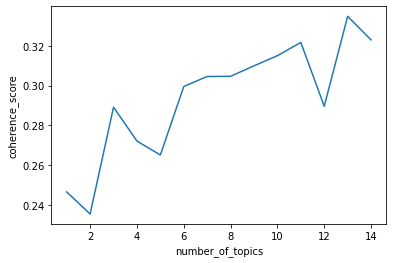

In [24]:
(id2word,corpus)= create_id2word_corpus(df_train_all)

find_number_of_topics(corpus,id2word,df_train_all)

In [25]:
n_topics = 4
lda_model = lda_modelling(corpus,id2word,n_topics)
print_topicwords(lda_model)

Topic: 0 Word: 0.043*"people" + 0.035*"relief" + 0.031*"haiti" + 0.023*"thoughts" + 0.019*"f" + 0.019*"prayers" + 0.014*"e" + 0.013*"effos" + 0.012*"pueorico" + 0.011*"go"
Topic: 1 Word: 0.044*"amp" + 0.032*"eqnz" + 0.029*"co" + 0.028*"https" + 0.026*"pueo" + 0.023*"rico" + 0.018*"tsunami" + 0.013*"floodsl" + 0.011*"safe" + 0.011*"warning"
Topic: 2 Word: 0.073*"mexico" + 0.046*"help" + 0.027*"affected" + 0.023*"italy" + 0.022*"victims" + 0.021*"please" + 0.016*"donate" + 0.014*"rescue" + 0.014*"need" + 0.014*"us"
Topic: 3 Word: 0.061*"hurricane" + 0.028*"flood" + 0.024*"city" + 0.022*"maria" + 0.019*"damage" + 0.015*"new" + 0.014*"maryland" + 0.013*"flooding" + 0.013*"floods" + 0.013*"water"


In [26]:
pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore")
vis = pyLDAvis.gensim_models.prepare(lda_model, 
                                     corpus, 
                                     dictionary=lda_model.id2word)

/Users/allupraveen/opt/anaconda3/lib/python3.9/site-packages/numexpr/expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_forbids_neg_powint = LooseVersion(numpy.__version__) >= LooseVersion('1.12.0b1')
/Users/allupraveen/opt/anaconda3/lib/python3.9/site-packages/numexpr/expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_forbids_neg_powint = LooseVersion(numpy.__version__) >= LooseVersion('1.12.0b1')
/Users/allupraveen/opt/anaconda3/lib/python3.9/site-packages/numexpr/expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_forbids_neg_powint = LooseVersion(numpy.__version__) >= LooseVersion('1.12.0b1')
/Users/allupraveen/opt/anaconda3/lib/python3.9/site-packages/numexpr/expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version 

In [27]:
warnings.filterwarnings("ignore")
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.314373  0.162927       1        1  31.741740
2     -0.259344  0.219396       2        1  26.064661
0     -0.073838 -0.138916       3        1  21.834757
1      0.018808 -0.243406       4        1  20.358841, topic_info=             Term         Freq        Total Category  logprob  loglift
3845       mexico  9855.000000  9855.000000  Default  30.0000  30.0000
8539    hurricane  9998.000000  9998.000000  Default  29.0000  29.0000
67           help  6166.000000  6166.000000  Default  28.0000  28.0000
391        people  4888.000000  4888.000000  Default  27.0000  27.0000
241           amp  4671.000000  4671.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
2444      central   477.282419   478.951678   Topic4  -5.3969   1.5882
31024        eqnz  3385.313840  3478.717300   Topic4  -3.4378   1.5644
33924     floodsl  1351.748068  1407.355264   Topic4  -4.3559   1.5513
15828          nz   602.677599   612.608028   Topic4  -5.1636   1.5753
31055  newzealand   521.023102   562.047573   Topic4  -5.3092   1.5159

[167 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
25         2  0.999709    affected
174        4  0.999350         aid
241        4  0.999870         amp
946        2  0.997791     another
144        4  0.998955       areas
...      ...       ...         ...
22043      4  0.998835  wellington
664        4  0.998428        work
5410       1  0.998319     zealand
5410       3  0.000595     zealand
5410       4  0.001190     zealand

[171 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2])

## LDA on Earthquake dataset

<AxesSubplot:xlabel='words', ylabel='count'>

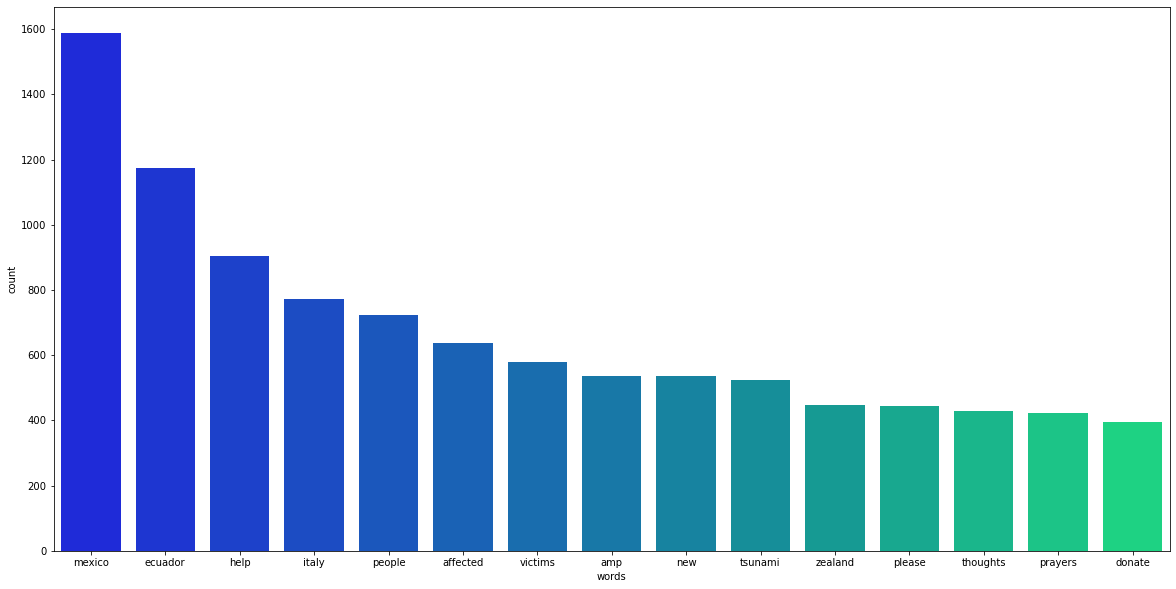

In [28]:
review_words = ','.join(list(df_earthquake['tweet_text'].values))

# Count and find the 30 most frequent
Counter = Counter(review_words.split())
most_frequent = Counter.most_common(15)
fig = plt.figure(1, figsize = (20,10))
sns.barplot(x = 'words', y = 'count', data = pd.DataFrame(most_frequent, columns=("words","count")), palette = 'winter')
# plt.xticks(rotation=45)

### Using coherence score to find optimal number of topics

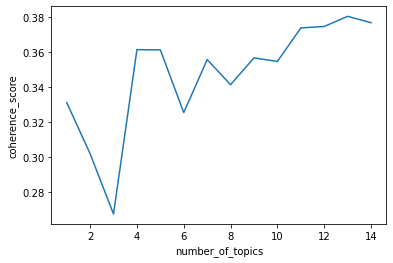

In [29]:
(id2word_eq,corpus_eq)= create_id2word_corpus(df_earthquake)

find_number_of_topics(corpus_eq,id2word_eq,df_earthquake)

In [30]:
n_topics = 4
lda_model_eq = lda_modelling(corpus_eq,id2word_eq,n_topics)
print_topicwords(lda_model_eq)

Topic: 0 Word: 0.056*"help" + 0.049*"eqnz" + 0.026*"tsunami" + 0.022*"please" + 0.013*"warning" + 0.012*"need" + 0.008*"nz" + 0.008*"like" + 0.008*"donating" + 0.008*"wellington"
Topic: 1 Word: 0.044*"mexico" + 0.027*"amp" + 0.026*"affected" + 0.023*"thoughts" + 0.018*"f" + 0.018*"relief" + 0.016*"prayers" + 0.014*"e" + 0.013*"safe" + 0.013*"italy"
Topic: 2 Word: 0.103*"mexico" + 0.036*"city" + 0.028*"co" + 0.027*"https" + 0.025*"victims" + 0.017*"rescue" + 0.017*"donate" + 0.011*"occurred" + 0.010*"utc" + 0.010*"mexicos"
Topic: 3 Word: 0.042*"people" + 0.030*"new" + 0.024*"zealand" + 0.024*"magnitude" + 0.021*"damage" + 0.017*"quake" + 0.013*"dead" + 0.012*"ecuador" + 0.011*"kills" + 0.011*"toll"


In [31]:
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(lda_model_eq, 
                                     corpus_eq, 
                                     dictionary=lda_model_eq.id2word)

/Users/allupraveen/opt/anaconda3/lib/python3.9/site-packages/numexpr/expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_forbids_neg_powint = LooseVersion(numpy.__version__) >= LooseVersion('1.12.0b1')
/Users/allupraveen/opt/anaconda3/lib/python3.9/site-packages/numexpr/expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_forbids_neg_powint = LooseVersion(numpy.__version__) >= LooseVersion('1.12.0b1')
/Users/allupraveen/opt/anaconda3/lib/python3.9/site-packages/numexpr/expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_forbids_neg_powint = LooseVersion(numpy.__version__) >= LooseVersion('1.12.0b1')
/Users/allupraveen/opt/anaconda3/lib/python3.9/site-packages/numexpr/expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version 

In [32]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.192322  0.059546       1        1  26.564243
3      0.129124 -0.258666       2        1  26.061018
0      0.218817  0.202542       3        1  25.104094
2     -0.155619 -0.003422       4        1  22.270645, topic_info=        Term         Freq        Total Category  logprob  loglift
849   mexico  2590.000000  2590.000000  Default  30.0000  30.0000
14      help  1015.000000  1015.000000  Default  29.0000  29.0000
4085    eqnz   889.000000   889.000000  Default  28.0000  28.0000
4     people   801.000000   801.000000  Default  27.0000  27.0000
876     city   585.000000   585.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
2740    list    66.529913    67.541502   Topic4  -5.4900   1.4868
8622   https   430.181818   462.509142   Topic4  -3.6234   1.4294
8644  alaska    68.086174    69.264881   Topic4  -5.4669   1.4847
849   mexico  1663.746881  2590.627953   Topic4  -2.2708   1.0591
2607   italy   103.084951   439.971850   Topic4  -5.0521   0.0507

[171 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
18        1  0.998561     affected
181       2  0.998763  aftershocks
56        1  0.996390          aid
8644      2  0.014437       alaska
8644      4  0.981739       alaska
...     ...       ...          ...
4088      3  0.984860   wellington
4088      4  0.007035   wellington
818       3  0.992471         work
984       3  0.997015        would
4096      2  0.998402      zealand

[162 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3])

## LDA on Hurricane dataset

<AxesSubplot:xlabel='words', ylabel='count'>

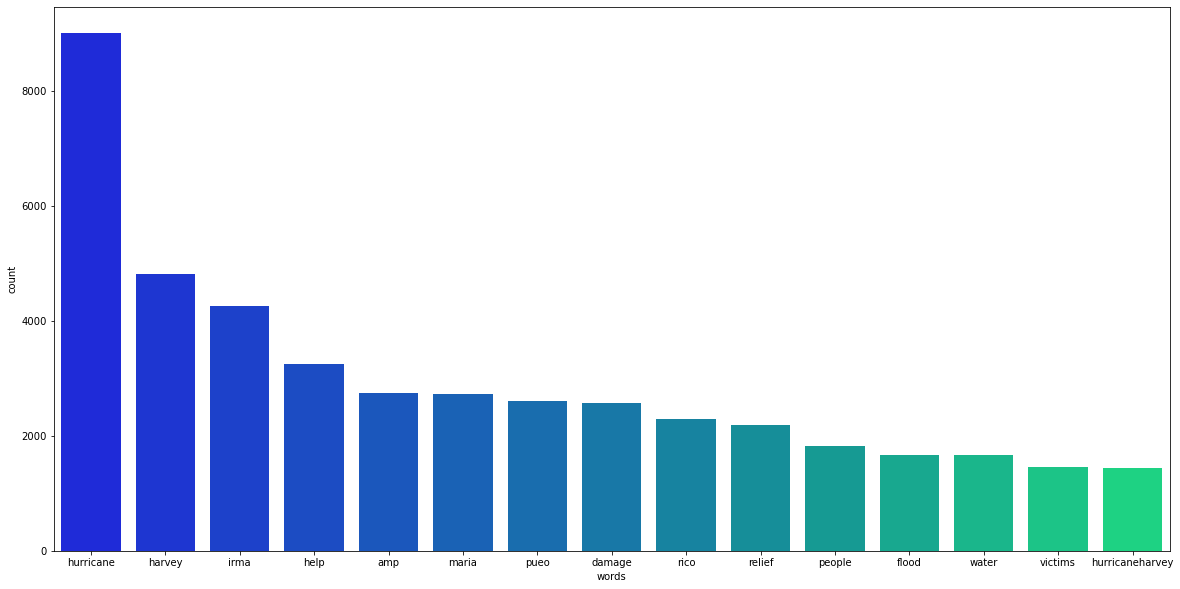

In [35]:
from collections import Counter
review_words = ','.join(list(df_hurricane['tweet_text'].values))

# Count and find the 30 most frequent
Counter = Counter(review_words.split())
most_frequent = Counter.most_common(15)
fig = plt.figure(1, figsize = (20,10))
sns.barplot(x = 'words', y = 'count', data = pd.DataFrame(most_frequent, columns=("words","count")), palette = 'winter')
# plt.xticks(rotation=45)

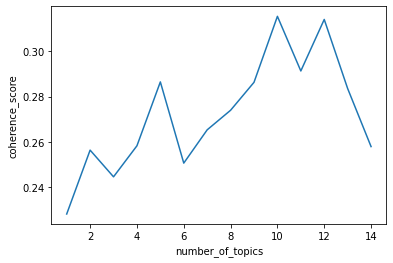

In [36]:
(id2word_hu,corpus_hu)= create_id2word_corpus(df_hurricane)

find_number_of_topics(corpus_hu,id2word_hu,df_hurricane)

In [37]:
n_topics = 4
lda_model_hu = lda_modelling(corpus_hu,id2word_hu,n_topics)
print_topicwords(lda_model_hu)

Topic: 0 Word: 0.099*"maria" + 0.027*"flood" + 0.024*"co" + 0.023*"https" + 0.018*"storm" + 0.016*"via" + 0.014*"flooding" + 0.011*"pr" + 0.010*"rain" + 0.009*"harvey"
Topic: 1 Word: 0.125*"hurricane" + 0.075*"haiti" + 0.044*"matthew" + 0.032*"damage" + 0.030*"irma" + 0.011*"destroyed" + 0.009*"toll" + 0.009*"news" + 0.009*"island" + 0.009*"death"
Topic: 2 Word: 0.046*"hurricane" + 0.040*"help" + 0.038*"hurricanemaria" + 0.032*"amp" + 0.025*"relief" + 0.023*"people" + 0.020*"pueorico" + 0.020*"please" + 0.017*"need" + 0.015*"us"
Topic: 3 Word: 0.078*"pueo" + 0.070*"rico" + 0.023*"water" + 0.021*"aid" + 0.012*"hurricaneirma" + 0.011*"power" + 0.010*"texas" + 0.009*"emergency" + 0.009*"still" + 0.008*"hurricaneharvey"


In [38]:
warnings.filterwarnings("ignore")
vis = pyLDAvis.gensim_models.prepare(lda_model_hu, 
                                     corpus_hu, 
                                     dictionary=lda_model_hu.id2word)

/Users/allupraveen/opt/anaconda3/lib/python3.9/site-packages/numexpr/expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_forbids_neg_powint = LooseVersion(numpy.__version__) >= LooseVersion('1.12.0b1')
/Users/allupraveen/opt/anaconda3/lib/python3.9/site-packages/numexpr/expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_forbids_neg_powint = LooseVersion(numpy.__version__) >= LooseVersion('1.12.0b1')
/Users/allupraveen/opt/anaconda3/lib/python3.9/site-packages/numexpr/expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_forbids_neg_powint = LooseVersion(numpy.__version__) >= LooseVersion('1.12.0b1')
/Users/allupraveen/opt/anaconda3/lib/python3.9/site-packages/numexpr/expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version 

In [39]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.216282 -0.118539       1        1  30.738736
1     -0.193993  0.106568       2        1  25.669653
3      0.220116 -0.241701       3        1  22.153917
0      0.190159  0.253671       4        1  21.437694, topic_info=            Term          Freq         Total Category  logprob  loglift
3      hurricane  14038.000000  14038.000000  Default  30.0000  30.0000
6921       maria   6480.000000   6480.000000  Default  29.0000  29.0000
6909       haiti   5849.000000   5849.000000  Default  28.0000  28.0000
10735       pueo   5273.000000   5273.000000  Default  27.0000  27.0000
10736       rico   4724.000000   4724.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
42            st    267.547574    268.281134   Topic4  -5.4974   1.5373
987        south    279.084605    279.852038   Topic4  -5.4552   1.5373
1633     workers    302.428007    303.418140   Topic4  -5.3749   1.5368
1056        hope    290.434547    291.318881   Topic4  -5.4153   1.5370
1         harvey    568.354503    985.184073   Topic4  -4.7440   0.9899

[160 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1642      4  0.996848     across
231       1  0.999116   affected
95        3  0.999208        aid
1870      1  0.998920  americans
34        1  0.999582        amp
...     ...       ...        ...
1949      4  0.998648       wind
17        4  0.998338      winds
345       3  0.999106    without
1633      4  0.995326    workers
256       3  0.996530      would

[139 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 1])